<a href="https://colab.research.google.com/github/hfwalvir/Python-PortfolioProjects/blob/main/Credit_Risk_Probability_of_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
credit_risk = pd.read_csv("/content/sample_data/credit_risk_dataset.csv")
credit_risk.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

# **DATA PREPROCESSING**

In [ ]:
credit_risk.shape

(32581, 12)

In [ ]:
credit_risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
credit_risk_copy = credit_risk.copy()

In [ ]:
credit_risk.pivot_table(index = 'person_age',columns= 'loan_status',values = 'person_income',aggfunc='count').reset_index().sort_values(by='person_age',ascending=False)

loan_status  person_age       0      1
57                  144     3.0    NaN
56                  123     2.0    NaN
55                   94     1.0    NaN
54                   84     1.0    NaN
53                   80     1.0    NaN
52                   78     1.0    NaN
51                   76     1.0    NaN
50                   73     3.0    NaN
49                   70     5.0    2.0
48                   69     5.0    NaN
47                   67     1.0    NaN
46                   66     6.0    3.0
45                   65     6.0    3.0
44                   64     6.0    1.0
43                   63     2.0    1.0
42                   62     4.0    3.0
41                   61     5.0    4.0
40                   60     8.0    7.0
39                   59     5.0    NaN
38                   58    16.0    3.0
37                   57    11.0    4.0
36                   56    14.0    1.0
35                   55    13.0    7.0
34                   54    17.0    7.0
33                   53    23.0    7.0
32                   52    24.0   12.0
31                   51    31.0    8.0
30                   50    40.0   12.0
29                   49    37.0   12.0
28                   48    55.0   20.0
27                   47    79.0   15.0
26                   46    82.0   12.0
25                   45    81.0   27.0
24                   44   114.0   27.0
23                   43   135.0   29.0
22                   42   138.0   50.0
21                   41   199.0   42.0
20                   40   214.0   57.0
19                   39   233.0   69.0
18                   38   311.0   62.0
17                   37   381.0   97.0
16                   36   425.0  123.0
15                   35   492.0  128.0
14                   34   570.0  139.0
13                   33   683.0  173.0
12                   32   771.0  193.0
11                   31   907.0  235.0
10                   30  1056.0  260.0
9                    29  1344.0  343.0
8                    28  1440.0  414.0
7                    27  1694.0  444.0
6                    26  1960.0  517.0
5                    25  2362.0  675.0
4                    24  2780.0  769.0
3                    23  3056.0  833.0
2                    22  2749.0  884.0
1                    21   857.0  372.0
0                    20    13.0    2.0

# **Considering only less than 70**

In [ ]:
cr_age_removed = credit_risk[credit_risk['person_age']<70]
cr_age_removed.reset_index(drop=True,inplace=True)

In [ ]:
cr_age_removed.shape

(32561, 12)

In [ ]:
cr_age_removed.pivot_table(index = 'person_emp_length',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values('person_emp_length',ascending=False)

loan_status  person_emp_length       0       1
34                       123.0     1.0     1.0
33                        38.0     1.0     NaN
32                        34.0     NaN     1.0
31                        31.0     4.0     NaN
30                        30.0     1.0     1.0
29                        29.0     NaN     1.0
28                        28.0     3.0     NaN
27                        27.0     4.0     1.0
26                        26.0     5.0     1.0
25                        25.0     8.0     NaN
24                        24.0     7.0     3.0
23                        23.0     6.0     3.0
22                        22.0    16.0     3.0
21                        21.0    28.0    10.0
20                        20.0    29.0    13.0
19                        19.0    55.0     9.0
18                        18.0    93.0    11.0
17                        17.0   107.0    22.0
16                        16.0   145.0    20.0
15                        15.0   195.0    43.0
14                        14.0   279.0    56.0
13                        13.0   375.0    51.0
12                        12.0   484.0    90.0
11                        11.0   604.0   136.0
10                        10.0   577.0   119.0
9                          9.0  1123.0   244.0
8                          8.0  1406.0   281.0
7                          7.0  1781.0   412.0
6                          6.0  2166.0   500.0
5                          5.0  2398.0   548.0
4                          4.0  2262.0   610.0
3                          3.0  2759.0   696.0
2                          2.0  2860.0   987.0
1                          1.0  2106.0   806.0
0                          0.0  2955.0  1145.0

# **Considering people with only less than 47 years of employee length**

In [ ]:
person_emp_removed = cr_age_removed[cr_age_removed['person_emp_length']<=47]
person_emp_removed.reset_index(drop=True,inplace=True)
person_emp_removed.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.10                         N                           2  
1                 0.57                         N                           3  
2                 0.53                         N                           2  
3                 0.55                         Y                           4  
4                 0.25                         N                           2

In [ ]:
person_emp_removed.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  31665.000000   3.166500e+04       31665.000000  31665.000000   
mean      27.709743   6.649461e+04           4.781462   9660.888994   
std        6.132880   5.277661e+04           4.028706   6334.933174   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.939600e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       69.000000   2.039784e+06          38.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28621.000000  31665.000000         31665.000000   
mean       11.040016      0.215474             0.169622   
std         3.229462      0.411158             0.106278   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                31665.000000  
mean                     5.800916  
std                      4.041164  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
person_emp_removed.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3044
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
credit_risk_data = person_emp_removed.copy()

In [ ]:
credit_risk_data.fillna({'loan_int_rate':credit_risk_data['loan_int_rate'].median()},inplace=True)

In [ ]:
credit_risk_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
credit_risk_data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  31665.000000   3.166500e+04       31665.000000  31665.000000   
mean      27.709743   6.649461e+04           4.781462   9660.888994   
std        6.132880   5.277661e+04           4.028706   6334.933174   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.939600e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       69.000000   2.039784e+06          38.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   31665.000000  31665.000000         31665.000000   
mean       11.035208      0.215474             0.169622   
std         3.070345      0.411158             0.106278   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.160000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                31665.000000  
mean                     5.800916  
std                      4.041164  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
credit_risk_data.groupby('loan_status').count()['person_age']

loan_status
0    24842
1     6823
Name: person_age, dtype: int64

In [ ]:
6823/(24842+6823)*100

21.547449865782408

In [ ]:
credit_risk_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.10                         N                           2  
1                 0.57                         N                           3  
2                 0.53                         N                           2  
3                 0.55                         Y                           4  
4                 0.25                         N                           2

In [ ]:
credit_risk_data.groupby('person_home_ownership').count()['loan_intent']

person_home_ownership
MORTGAGE    13086
OTHER         107
OWN          2410
RENT        16062
Name: loan_intent, dtype: int64

In [ ]:
credit_risk_data.groupby('loan_intent').count()['person_home_ownership']

loan_intent
DEBTCONSOLIDATION    5063
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5888
PERSONAL             5363
VENTURE              5553
Name: person_home_ownership, dtype: int64

In [ ]:
credit_risk_data.groupby('loan_grade').count()['person_home_ownership']

loan_grade
A    10363
B    10179
C     6317
D     3554
E      952
F      236
G       64
Name: person_home_ownership, dtype: int64

In [ ]:
credit_data = credit_risk_data.copy()

In [ ]:
cr_data_copy = credit_data.drop('loan_grade',axis=1)

In [ ]:
cr_data_copy.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0   EDUCATION       1000          11.14            0                 0.10   
1     MEDICAL       5500          12.87            1                 0.57   
2     MEDICAL      35000          15.23            1                 0.53   
3     MEDICAL      35000          14.27            1                 0.55   
4     VENTURE       2500           7.14            1                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                           2  
1                         N                           3  
2                         N                           2  
3                         Y                           4  
4                         N                           2

In [ ]:
cr_data_copy.shape

(31665, 11)

# **Categorical Features Treatment**

In [ ]:
cr_data_cat = cr_data_copy.copy()

In [ ]:
person_home_ownership = pd.get_dummies(cr_data_cat['person_home_ownership'],drop_first=True).astype(int)

In [ ]:
loan_intent = pd.get_dummies(cr_data_cat['loan_intent'],drop_first=True).astype(int)


In [ ]:
cr_data_cat['cb_person_default_on_file_binary'] = np.where(cr_data_cat['cb_person_default_on_file']=='Y',1,0)

In [ ]:
person_home_ownership.head()

OTHER  OWN  RENT
0      0    1     0
1      0    0     0
2      0    0     1
3      0    0     1
4      0    1     0

In [ ]:
cr_data_cat.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0   EDUCATION       1000          11.14            0                 0.10   
1     MEDICAL       5500          12.87            1                 0.57   
2     MEDICAL      35000          15.23            1                 0.53   
3     MEDICAL      35000          14.27            1                 0.55   
4     VENTURE       2500           7.14            1                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  \
0                         N                           2   
1                         N                           3   
2                         N                           2   
3                         Y                           4   
4                         N                           2   

   cb_person_default_on_file_binary  
0                                 0  
1                                 0  
2                                 0  
3                                 1  
4                                 0

# **Standardizing data**

In [ ]:
data_to_scale = cr_data_cat.drop(['person_home_ownership','loan_intent','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary'],axis=1)

In [ ]:
data_to_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
data_to_scale.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          21           9600                5.0       1000          11.14   
1          25           9600                1.0       5500          12.87   
2          23          65500                4.0      35000          15.23   
3          24          54400                8.0      35000          14.27   
4          21           9900                2.0       2500           7.14   

   loan_percent_income  cb_person_cred_hist_length  
0                 0.10                           2  
1                 0.57                           3  
2                 0.53                           2  
3                 0.55                           4  
4                 0.25                           2

In [ ]:
#formula for standard scaling : (x-mean of x).std of x
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(data_to_scale)
scaled_data = pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_data.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.094078      -1.078044           0.054246  -1.367185       0.034131   
1   -0.441845      -1.078044          -0.938644  -0.656827       0.597594   
2   -0.767962      -0.018846          -0.193977   3.999965       1.366250   
3   -0.604904      -0.229170           0.798914   3.999965       1.053576   
4   -1.094078      -1.072359          -0.690422  -1.130399      -1.268675   

   loan_percent_income  cb_person_cred_hist_length  
0            -0.655105                   -0.940565  
1             3.767318                   -0.693107  
2             3.390942                   -0.940565  
3             3.579130                   -0.445650  
4             0.756307                   -0.940565

In [ ]:
round(np.std(scaled_data.person_income),2)

1.0

In [ ]:
scaled_data_combined = pd.concat([scaled_data,person_home_ownership,loan_intent],axis=1)
scaled_data_combined.shape

(31665, 15)

In [ ]:
scaled_data_combined['cb_person_default_on_file'] = cr_data_cat['cb_person_default_on_file_binary']

In [ ]:
scaled_data_combined.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.094078      -1.078044           0.054246  -1.367185       0.034131   
1   -0.441845      -1.078044          -0.938644  -0.656827       0.597594   
2   -0.767962      -0.018846          -0.193977   3.999965       1.366250   
3   -0.604904      -0.229170           0.798914   3.999965       1.053576   
4   -1.094078      -1.072359          -0.690422  -1.130399      -1.268675   

   loan_percent_income  cb_person_cred_hist_length  OTHER  OWN  RENT  \
0            -0.655105                   -0.940565      0    1     0   
1             3.767318                   -0.693107      0    0     0   
2             3.390942                   -0.940565      0    0     1   
3             3.579130                   -0.445650      0    0     1   
4             0.756307                   -0.940565      0    1     0   

   EDUCATION  HOMEIMPROVEMENT  MEDICAL  PERSONAL  VENTURE  \
0          1                0        0         0        0   
1          0                0        1         0        0   
2          0                0        1         0        0   
3          0                0        1         0        0   
4          0                0        0         0        1   

   cb_person_default_on_file  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0

In [ ]:
scaled_data_combined['loan_status']= cr_data_cat['loan_status']

In [ ]:
scaled_data_combined.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.094078      -1.078044           0.054246  -1.367185       0.034131   
1   -0.441845      -1.078044          -0.938644  -0.656827       0.597594   
2   -0.767962      -0.018846          -0.193977   3.999965       1.366250   
3   -0.604904      -0.229170           0.798914   3.999965       1.053576   
4   -1.094078      -1.072359          -0.690422  -1.130399      -1.268675   

   loan_percent_income  cb_person_cred_hist_length  OTHER  OWN  RENT  \
0            -0.655105                   -0.940565      0    1     0   
1             3.767318                   -0.693107      0    0     0   
2             3.390942                   -0.940565      0    0     1   
3             3.579130                   -0.445650      0    0     1   
4             0.756307                   -0.940565      0    1     0   

   EDUCATION  HOMEIMPROVEMENT  MEDICAL  PERSONAL  VENTURE  \
0          1                0        0         0        0   
1          0                0        1         0        0   
2          0                0        1         0        0   
3          0                0        1         0        0   
4          0                0        0         0        1   

   cb_person_default_on_file  loan_status  
0                          0            0  
1                          0            1  
2                          0            1  
3                          1            1  
4                          0            1

In [ ]:
scaled_data_combined.shape

(31665, 17)

In [ ]:
scaled_data_combined.groupby('loan_status').count()['EDUCATION']

loan_status
0    24842
1     6823
Name: EDUCATION, dtype: int64

In [ ]:
6823/(6823+24842)*100 #Data is not balanced

21.547449865782408

# **Inlcuding financial ratios**

In [ ]:
#Debt to Income Ratio
credit_risk_data['debt_to_income'] = credit_risk_data['loan_amnt'] / credit_risk_data['person_income']
# Loan-to-Income Ratio
credit_risk_data['loan_to_income'] = credit_risk_data['loan_amnt'] / credit_risk_data['person_income']

# Interest Coverage Ratio (simplified version)
credit_risk_data['interest_coverage'] = credit_risk_data['person_income'] / (credit_risk_data['loan_amnt'] * credit_risk_data['loan_int_rate'] / 100)

# Credit Utilization Ratio (assuming loan_amnt represents current debt)
credit_risk_data['credit_utilization'] = credit_risk_data['loan_amnt'] / credit_risk_data['person_income']

# Age to Income Ratio
credit_risk_data['age_to_income'] = credit_risk_data['person_age'] / credit_risk_data['person_income']

# Employment Length to Age Ratio
credit_risk_data['emp_length_to_age'] = credit_risk_data['person_emp_length'] / credit_risk_data['person_age']

**`Adding the aforementioned financial ratios into features`**

In [ ]:
from types import new_class
for ratio in ['debt_to_income','loan_to_income','interest_coverage', 'credit_utilization', 'age_to_income', 'emp_length_to_age']:
  scaled_data_combined[ratio] = credit_risk_data[ratio]
#Scale the new features
new_features_inclusion = scaled_data_combined[['debt_to_income','loan_to_income','interest_coverage', 'credit_utilization', 'age_to_income', 'emp_length_to_age']]
scaled_new_features = scaler.fit_transform(new_features_inclusion)
scaled_data_combined[new_features_inclusion.columns] = scaled_new_features
scaled_data_combined.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.094078      -1.078044           0.054246  -1.367185       0.034131   
1   -0.441845      -1.078044          -0.938644  -0.656827       0.597594   
2   -0.767962      -0.018846          -0.193977   3.999965       1.366250   
3   -0.604904      -0.229170           0.798914   3.999965       1.053576   
4   -1.094078      -1.072359          -0.690422  -1.130399      -1.268675   

   loan_percent_income  cb_person_cred_hist_length  OTHER  OWN  RENT  ...  \
0            -0.655105                   -0.940565      0    1     0  ...   
1             3.767318                   -0.693107      0    0     0  ...   
2             3.390942                   -0.940565      0    0     1  ...   
3             3.579130                   -0.445650      0    0     1  ...   
4             0.756307                   -0.940565      0    1     0  ...   

   PERSONAL  VENTURE  cb_person_default_on_file  loan_status  debt_to_income  \
0         0        0                          0            0       -0.617671   
1         0        0                          0            1        3.781539   
2         0        0                          0            1        3.419603   
3         0        0                          1            1        4.442859   
4         0        1                          0            1        0.774672   

   loan_to_income  interest_coverage  credit_utilization  age_to_income  \
0       -0.617671          -0.085878           -0.617671       4.294140   
1        3.781539          -0.593891            3.781539       5.399143   
2        3.419603          -0.602807            3.419603      -0.575889   
3        4.442859          -0.612572            4.442859      -0.337125   
4        0.774672          -0.300755            0.774672       4.118344   

   emp_length_to_age  
0           0.473173  
1          -0.991703  
2          -0.001442  
3           1.177441  
4          -0.583228  

[5 rows x 23 columns]

In [ ]:
credit_risk_data.to_excel(r"/content/sample_data/credit_risk.xlsx",index=False)

In [ ]:
scaled_data_combined.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'OTHER', 'OWN', 'RENT', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE', 'cb_person_default_on_file', 'loan_status',
       'debt_to_income', 'loan_to_income', 'interest_coverage',
       'credit_utilization', 'age_to_income', 'emp_length_to_age'],
      dtype='object')

# **Handling imbalaned data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status',axis=1)


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
balanced_features,balanced_target = smote.fit_resample(features,target)

In [ ]:
balanced_features.shape

(49684, 22)

# **Training Models**

In [ ]:
scaled_data_combined.groupby('loan_status').size()

loan_status
0    24842
1     6823
dtype: int64

In [ ]:
balanced_target_df = pd.DataFrame({'target':balanced_target})

In [ ]:
balanced_target_df.head()

target
0       0
1       1
2       1
3       1
4       1

In [ ]:
balanced_target_df.groupby('target').size() #Data is balanced successfully

target
0    24842
1    24842
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_features,balanced_target,test_size=0.2,random_state=42)

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import pickle
with open ('logisticPDmodel.pkl','wb') as file:
  pickle.dump(logit,file)

In [ ]:
logit.score(X_train,y_train)

0.8000100636526027

In [ ]:
logit_prediction = logit.predict(X_test)

In [ ]:
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4977
           1       0.80      0.80      0.80      4960

    accuracy                           0.80      9937
   macro avg       0.80      0.80      0.80      9937
weighted avg       0.80      0.80      0.80      9937



In [ ]:
print(logit.coef_)

[[-0.23410196  0.19933828 -0.11064315 -0.37142834  1.01307644 -9.1022552
  -0.01205771 -0.73405936 -2.49150666  0.44530356 -1.49899896 -0.58377231
  -1.11245303 -1.29311537 -1.90574673 -0.03947844  3.42376237  3.42376237
   0.06932428  3.42376237  0.60307337  0.07265063]]


# ***FEATURE IMPORTANCES***

In [ ]:
features_imp_logit = pd.DataFrame({'features':balanced_features.columns,'logit_imp':logit.coef_[0]})
features_imp_logit.sort_values(by='logit_imp',ascending=False)

features  logit_imp
19          credit_utilization   3.423762
17              loan_to_income   3.423762
16              debt_to_income   3.423762
4                loan_int_rate   1.013076
20               age_to_income   0.603073
9                         RENT   0.445304
1                person_income   0.199338
21           emp_length_to_age   0.072651
18           interest_coverage   0.069324
6   cb_person_cred_hist_length  -0.012058
15   cb_person_default_on_file  -0.039478
2            person_emp_length  -0.110643
0                   person_age  -0.234102
3                    loan_amnt  -0.371428
11             HOMEIMPROVEMENT  -0.583772
7                        OTHER  -0.734059
12                     MEDICAL  -1.112453
13                    PERSONAL  -1.293115
10                   EDUCATION  -1.498999
14                     VENTURE  -1.905747
8                          OWN  -2.491507
5          loan_percent_income  -9.102255

# **`Random Forest `**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
with open ('RandomForestPDmodel.pkl','wb') as file:
  pickle.dump(rf,file)

In [ ]:
rf.score(X_train,y_train)

1.0

In [ ]:
rf_prediction = rf.predict(X_test)
rf_prediction

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4977
           1       0.96      0.90      0.93      4960

    accuracy                           0.93      9937
   macro avg       0.93      0.93      0.93      9937
weighted avg       0.93      0.93      0.93      9937



In [ ]:
rf.feature_importances_


array([0.0380935 , 0.08012666, 0.03964316, 0.04487111, 0.15667072,
       0.07080107, 0.03955793, 0.00022936, 0.02016966, 0.03456482,
       0.0144019 , 0.01228397, 0.00654196, 0.01100886, 0.01826053,
       0.01356478, 0.07141907, 0.06815105, 0.1046554 , 0.06060963,
       0.05521616, 0.03915871])

In [ ]:
feature_imp_rf = pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
feature_imp_rf.sort_values(by='rf_imp',ascending=False)

features    rf_imp
4                loan_int_rate  0.156671
18           interest_coverage  0.104655
1                person_income  0.080127
16              debt_to_income  0.071419
5          loan_percent_income  0.070801
17              loan_to_income  0.068151
19          credit_utilization  0.060610
20               age_to_income  0.055216
3                    loan_amnt  0.044871
2            person_emp_length  0.039643
6   cb_person_cred_hist_length  0.039558
21           emp_length_to_age  0.039159
0                   person_age  0.038094
9                         RENT  0.034565
8                          OWN  0.020170
14                     VENTURE  0.018261
10                   EDUCATION  0.014402
15   cb_person_default_on_file  0.013565
11             HOMEIMPROVEMENT  0.012284
13                    PERSONAL  0.011009
12                     MEDICAL  0.006542
7                        OTHER  0.000229

# **XGBOOST MODEL**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(tree_method='exact')

In [ ]:

xgb_model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
with open ('XGBPDmodel.pkl','wb') as file:
  pickle.dump(xgb_model,file)

In [ ]:
xgb_model.score(X_train,y_train.values.ravel())

0.9684756082220042

In [ ]:
xgb_prediction = xgb_model.predict(X_test)
xgb_prediction

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4977
           1       0.98      0.92      0.95      4960

    accuracy                           0.95      9937
   macro avg       0.95      0.95      0.95      9937
weighted avg       0.95      0.95      0.95      9937



In [ ]:
xgb_model.feature_importances_

array([0.04636715, 0.03901274, 0.06056868, 0.0082526 , 0.05987096,
       0.03823043, 0.07339234, 0.00685582, 0.14311193, 0.08889877,
       0.04885264, 0.0526604 , 0.0140997 , 0.04636835, 0.09755719,
       0.01709638, 0.05569856, 0.        , 0.087496  , 0.        ,
       0.00834018, 0.00726914], dtype=float32)

In [ ]:
feature_importance_xgb = pd.DataFrame({'features':features.columns,'xgb_importances':xgb_model.feature_importances_})
feature_importance_xgb.sort_values(by='xgb_importances',ascending=False)

features  xgb_importances
8                          OWN         0.143112
14                     VENTURE         0.097557
9                         RENT         0.088899
18           interest_coverage         0.087496
6   cb_person_cred_hist_length         0.073392
2            person_emp_length         0.060569
4                loan_int_rate         0.059871
16              debt_to_income         0.055699
11             HOMEIMPROVEMENT         0.052660
10                   EDUCATION         0.048853
13                    PERSONAL         0.046368
0                   person_age         0.046367
1                person_income         0.039013
5          loan_percent_income         0.038230
15   cb_person_default_on_file         0.017096
12                     MEDICAL         0.014100
20               age_to_income         0.008340
3                    loan_amnt         0.008253
21           emp_length_to_age         0.007269
7                        OTHER         0.006856
17              loan_to_income         0.000000
19          credit_utilization         0.000000

In [ ]:
xgb_importances = feature_importance_xgb['xgb_importances']

# If you want to convert it to a list or another format, you can do so
xgb_importances_list = xgb_importances.tolist()

In [ ]:
feature_imp = pd.concat([features_imp_logit,feature_imp_rf,feature_importance_xgb],axis=1)

In [ ]:
feature_imp

features  logit_imp                    features  \
0                   person_age  -0.234102                  person_age   
1                person_income   0.199338               person_income   
2            person_emp_length  -0.110643           person_emp_length   
3                    loan_amnt  -0.371428                   loan_amnt   
4                loan_int_rate   1.013076               loan_int_rate   
5          loan_percent_income  -9.102255         loan_percent_income   
6   cb_person_cred_hist_length  -0.012058  cb_person_cred_hist_length   
7                        OTHER  -0.734059                       OTHER   
8                          OWN  -2.491507                         OWN   
9                         RENT   0.445304                        RENT   
10                   EDUCATION  -1.498999                   EDUCATION   
11             HOMEIMPROVEMENT  -0.583772             HOMEIMPROVEMENT   
12                     MEDICAL  -1.112453                     MEDICAL   
13                    PERSONAL  -1.293115                    PERSONAL   
14                     VENTURE  -1.905747                     VENTURE   
15   cb_person_default_on_file  -0.039478   cb_person_default_on_file   
16              debt_to_income   3.423762              debt_to_income   
17              loan_to_income   3.423762              loan_to_income   
18           interest_coverage   0.069324           interest_coverage   
19          credit_utilization   3.423762          credit_utilization   
20               age_to_income   0.603073               age_to_income   
21           emp_length_to_age   0.072651           emp_length_to_age   

      rf_imp                    features  xgb_importances  
0   0.038094                  person_age         0.046367  
1   0.080127               person_income         0.039013  
2   0.039643           person_emp_length         0.060569  
3   0.044871                   loan_amnt         0.008253  
4   0.156671               loan_int_rate         0.059871  
5   0.070801         loan_percent_income         0.038230  
6   0.039558  cb_person_cred_hist_length         0.073392  
7   0.000229                       OTHER         0.006856  
8   0.020170                         OWN         0.143112  
9   0.034565                        RENT         0.088899  
10  0.014402                   EDUCATION         0.048853  
11  0.012284             HOMEIMPROVEMENT         0.052660  
12  0.006542                     MEDICAL         0.014100  
13  0.011009                    PERSONAL         0.046368  
14  0.018261                     VENTURE         0.097557  
15  0.013565   cb_person_default_on_file         0.017096  
16  0.071419              debt_to_income         0.055699  
17  0.068151              loan_to_income         0.000000  
18  0.104655           interest_coverage         0.087496  
19  0.060610          credit_utilization         0.000000  
20  0.055216               age_to_income         0.008340  
21  0.039159           emp_length_to_age         0.007269

# **FURTHER EXPLORATION**

In [ ]:
xgb_prediction_df = pd.DataFrame({'test_indices_xgb':X_test.index,'xgb_pred':xgb_prediction})
xgb_prediction_df.head()

test_indices_xgb  xgb_pred
0             45873         1
1             15189         0
2             24651         0
3             31710         1
4             22193         0

In [ ]:
logit_prediction_df = pd.DataFrame({'test_indices_logit':X_test.index,'logit_pred':logit_prediction})
logit_prediction_df.head()

test_indices_logit  logit_pred
0               45873           1
1               15189           0
2               24651           0
3               31710           1
4               22193           1

In [ ]:
rf_prediction_df = pd.DataFrame({'test_indices_rf':X_test.index,'rf_pred':rf_prediction})
rf_prediction_df.head()

test_indices_rf  rf_pred
0            45873        1
1            15189        0
2            24651        0
3            31710        1
4            22193        0

In [ ]:
#Merging with original data
merged_with_original = cr_data_copy.merge(xgb_prediction_df, left_index=True,right_on ='test_indices_xgb',how='left')
merged_with_original.head()

person_age  person_income person_home_ownership  person_emp_length  \
NaN             21           9600                   OWN                5.0   
9826.0          25           9600              MORTGAGE                1.0   
NaN             23          65500                  RENT                4.0   
NaN             24          54400                  RENT                8.0   
427.0           21           9900                   OWN                2.0   

       loan_intent  loan_amnt  loan_int_rate  loan_status  \
NaN      EDUCATION       1000          11.14            0   
9826.0     MEDICAL       5500          12.87            1   
NaN        MEDICAL      35000          15.23            1   
NaN        MEDICAL      35000          14.27            1   
427.0      VENTURE       2500           7.14            1   

        loan_percent_income cb_person_default_on_file  \
NaN                    0.10                         N   
9826.0                 0.57                         N   
NaN                    0.53                         N   
NaN                    0.55                         Y   
427.0                  0.25                         N   

        cb_person_cred_hist_length  test_indices_xgb  xgb_pred  
NaN                              2                 0       NaN  
9826.0                           3                 1       1.0  
NaN                              2                 2       NaN  
NaN                              4                 3       NaN  
427.0                            2                 4       1.0

In [ ]:
merged_with_rf =merged_with_original.merge(rf_prediction_df, left_index=True,right_on ='test_indices_rf',how='left')
merged_with_rf.head()

person_age  person_income person_home_ownership  person_emp_length  \
NaN             21           9600                   OWN                5.0   
8501.0          25           9600              MORTGAGE                1.0   
NaN             23          65500                  RENT                4.0   
NaN             24          54400                  RENT                8.0   
NaN             21           9900                   OWN                2.0   

       loan_intent  loan_amnt  loan_int_rate  loan_status  \
NaN      EDUCATION       1000          11.14            0   
8501.0     MEDICAL       5500          12.87            1   
NaN        MEDICAL      35000          15.23            1   
NaN        MEDICAL      35000          14.27            1   
NaN        VENTURE       2500           7.14            1   

        loan_percent_income cb_person_default_on_file  \
NaN                    0.10                         N   
8501.0                 0.57                         N   
NaN                    0.53                         N   
NaN                    0.55                         Y   
NaN                    0.25                         N   

        cb_person_cred_hist_length  test_indices_xgb  xgb_pred  \
NaN                              2                 0       NaN   
8501.0                           3                 1       1.0   
NaN                              2                 2       NaN   
NaN                              4                 3       NaN   
NaN                              2                 4       1.0   

        test_indices_rf  rf_pred  
NaN                 NaN      NaN  
8501.0           9826.0      1.0  
NaN                 NaN      NaN  
NaN                 NaN      NaN  
NaN               427.0      NaN

In [ ]:
merged_with_final =merged_with_rf.merge(logit_prediction_df, left_index=True,right_on ='test_indices_logit',how='left')
merged_with_final.head()

person_age  person_income person_home_ownership  person_emp_length  \
NaN          21           9600                   OWN                5.0   
NaN          25           9600              MORTGAGE                1.0   
NaN          23          65500                  RENT                4.0   
NaN          24          54400                  RENT                8.0   
NaN          21           9900                   OWN                2.0   

    loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
NaN   EDUCATION       1000          11.14            0                 0.10   
NaN     MEDICAL       5500          12.87            1                 0.57   
NaN     MEDICAL      35000          15.23            1                 0.53   
NaN     MEDICAL      35000          14.27            1                 0.55   
NaN     VENTURE       2500           7.14            1                 0.25   

    cb_person_default_on_file  cb_person_cred_hist_length  test_indices_xgb  \
NaN                         N                           2                 0   
NaN                         N                           3                 1   
NaN                         N                           2                 2   
NaN                         Y                           4                 3   
NaN                         N                           2                 4   

     xgb_pred  test_indices_rf  rf_pred  test_indices_logit  logit_pred  
NaN       NaN              NaN      NaN                 NaN         NaN  
NaN       1.0           9826.0      1.0              8501.0         NaN  
NaN       NaN              NaN      NaN                 NaN         NaN  
NaN       NaN              NaN      NaN                 NaN         NaN  
NaN       1.0            427.0      NaN                 NaN         NaN

In [ ]:
merged_with_final.dropna(inplace=True)

In [ ]:
final_data_with_pred = merged_with_final.drop(['test_indices_xgb','test_indices_logit','test_indices_rf'],axis=1)
final_data_with_pred.head()

person_age  person_income person_home_ownership  person_emp_length  \
8386.0          26          56000                  RENT                7.0   
814.0           22          19200              MORTGAGE                6.0   
8094.0          23          20000              MORTGAGE                7.0   
3253.0          25          54000                  RENT                6.0   
2292.0          22          24000                   OWN                3.0   

            loan_intent  loan_amnt  loan_int_rate  loan_status  \
8386.0          MEDICAL      22000          17.19            1   
814.0   HOMEIMPROVEMENT       1400          14.91            1   
8094.0        EDUCATION       3625          10.99            0   
3253.0         PERSONAL      20000           8.88            1   
2292.0        EDUCATION       2500          10.59            0   

        loan_percent_income cb_person_default_on_file  \
8386.0                 0.39                         N   
814.0                  0.07                         Y   
8094.0                 0.18                         Y   
3253.0                 0.37                         N   
2292.0                 0.10                         N   

        cb_person_cred_hist_length  xgb_pred  rf_pred  logit_pred  
8386.0                           3       1.0      0.0         0.0  
814.0                            4       1.0      0.0         0.0  
8094.0                           3       0.0      0.0         0.0  
3253.0                           3       1.0      0.0         1.0  
2292.0                           2       0.0      1.0         0.0

In [ ]:
final_data_with_pred.to_excel(r"/content/sample_data/pd.prediction.xlsx",index=False)

In [ ]:
print(classification_report(final_data_with_pred['loan_status'],final_data_with_pred['xgb_pred']))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       207
           1       0.91      0.74      0.82        70

    accuracy                           0.92       277
   macro avg       0.92      0.86      0.88       277
weighted avg       0.92      0.92      0.91       277



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(final_data_with_pred['loan_status'],final_data_with_pred['xgb_pred'])

array([[202,   5],
       [ 18,  52]])

# **AUTOMATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def ModelPreProcessing(df):
    # Outliers Treatment
    cr_age_rmvd = df[df['person_age'] <= 70]
    cr_age_rmvd.reset_index(drop=True, inplace=True)
    person_emp_rmvd = cr_age_rmvd[cr_age_rmvd['person_emp_length'] <= 47]
    person_emp_rmvd.reset_index(drop=True, inplace=True)
    cr_data = person_emp_rmvd.copy()

    # Missing Values Treatment
    cr_data.fillna({'loan_int_rate': cr_data['loan_int_rate'].median()}, inplace=True)
    cr_data_copy = cr_data.drop('loan_grade', axis=1)
    cr_data_cat_treated = cr_data_copy.copy()

    # Categorical Variables Treatment
    person_home_ownership = pd.get_dummies(cr_data_cat_treated['person_home_ownership'], drop_first=True).astype(int)
    loan_intent = pd.get_dummies(cr_data_cat_treated['loan_intent'], drop_first=True).astype(int)
    cr_data_cat_treated['cb_person_default_on_file_binary'] = np.where(cr_data_cat_treated['cb_person_default_on_file'] == 'Y', 1, 0)

    # Adding Financial Ratios
    cr_data_cat_treated['debt_to_income'] = cr_data_cat_treated['loan_amnt'] / cr_data_cat_treated['person_income']
    cr_data_cat_treated['loan_to_income'] = cr_data_cat_treated['loan_amnt'] / cr_data_cat_treated['person_income']
    cr_data_cat_treated['interest_coverage'] = cr_data_cat_treated['person_income'] / (cr_data_cat_treated['loan_amnt'] * cr_data_cat_treated['loan_int_rate'] / 100)
    cr_data_cat_treated['credit_utilization'] = cr_data_cat_treated['loan_amnt'] / cr_data_cat_treated['person_income']
    cr_data_cat_treated['age_to_income'] = cr_data_cat_treated['person_age'] / cr_data_cat_treated['person_income']
    cr_data_cat_treated['emp_length_to_age'] = cr_data_cat_treated['person_emp_length'] / cr_data_cat_treated['person_age']

    # Scaling the data
    data_to_scale = cr_data_cat_treated.drop(['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file', 'cb_person_default_on_file_binary'], axis=1)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_to_scale)
    scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)
    scaled_data_combined = pd.concat([scaled_df, person_home_ownership, loan_intent], axis=1)
    scaled_data_combined['cb_person_default_on_file'] = cr_data_cat_treated['cb_person_default_on_file_binary']
    scaled_data_combined['loan_status'] = cr_data_cat_treated['loan_status']

    # Features and Target Creation
    target = scaled_data_combined['loan_status']
    features = scaled_data_combined.drop('loan_status', axis=1)

    # SMOTE Balancing
    smote = SMOTE()
    balanced_features, balanced_target = smote.fit_resample(features, target)

    # Return the final datasets
    return cr_data_cat_treated, scaled_data_combined, features, target, balanced_features, balanced_target


In [ ]:
df = pd.read_csv('/content/sample_data/credit_risk_dataset.csv')
cr_data, data_to_scale,features,target, balanced_features, balanced_target = ModelPreProcessing(df)

In [ ]:
cr_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0   EDUCATION       1000          11.14            0                 0.10   
1     MEDICAL       5500          12.87            1                 0.57   
2     MEDICAL      35000          15.23            1                 0.53   
3     MEDICAL      35000          14.27            1                 0.55   
4     VENTURE       2500           7.14            1                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  \
0                         N                           2   
1                         N                           3   
2                         N                           2   
3                         Y                           4   
4                         N                           2   

   cb_person_default_on_file_binary  debt_to_income  loan_to_income  \
0                                 0        0.104167        0.104167   
1                                 0        0.572917        0.572917   
2                                 0        0.534351        0.534351   
3                                 1        0.643382        0.643382   
4                                 0        0.252525        0.252525   

   interest_coverage  credit_utilization  age_to_income  emp_length_to_age  
0          86.175943            0.104167       0.002188           0.238095  
1          13.562195            0.572917       0.002604           0.040000  
2          12.287778            0.534351       0.000351           0.173913  
3          10.891981            0.643382       0.000441           0.333333  
4          55.462185            0.252525       0.002121           0.095238

In [ ]:
cr_data.drop('cb_person_default_on_file',axis=1,inplace=True)

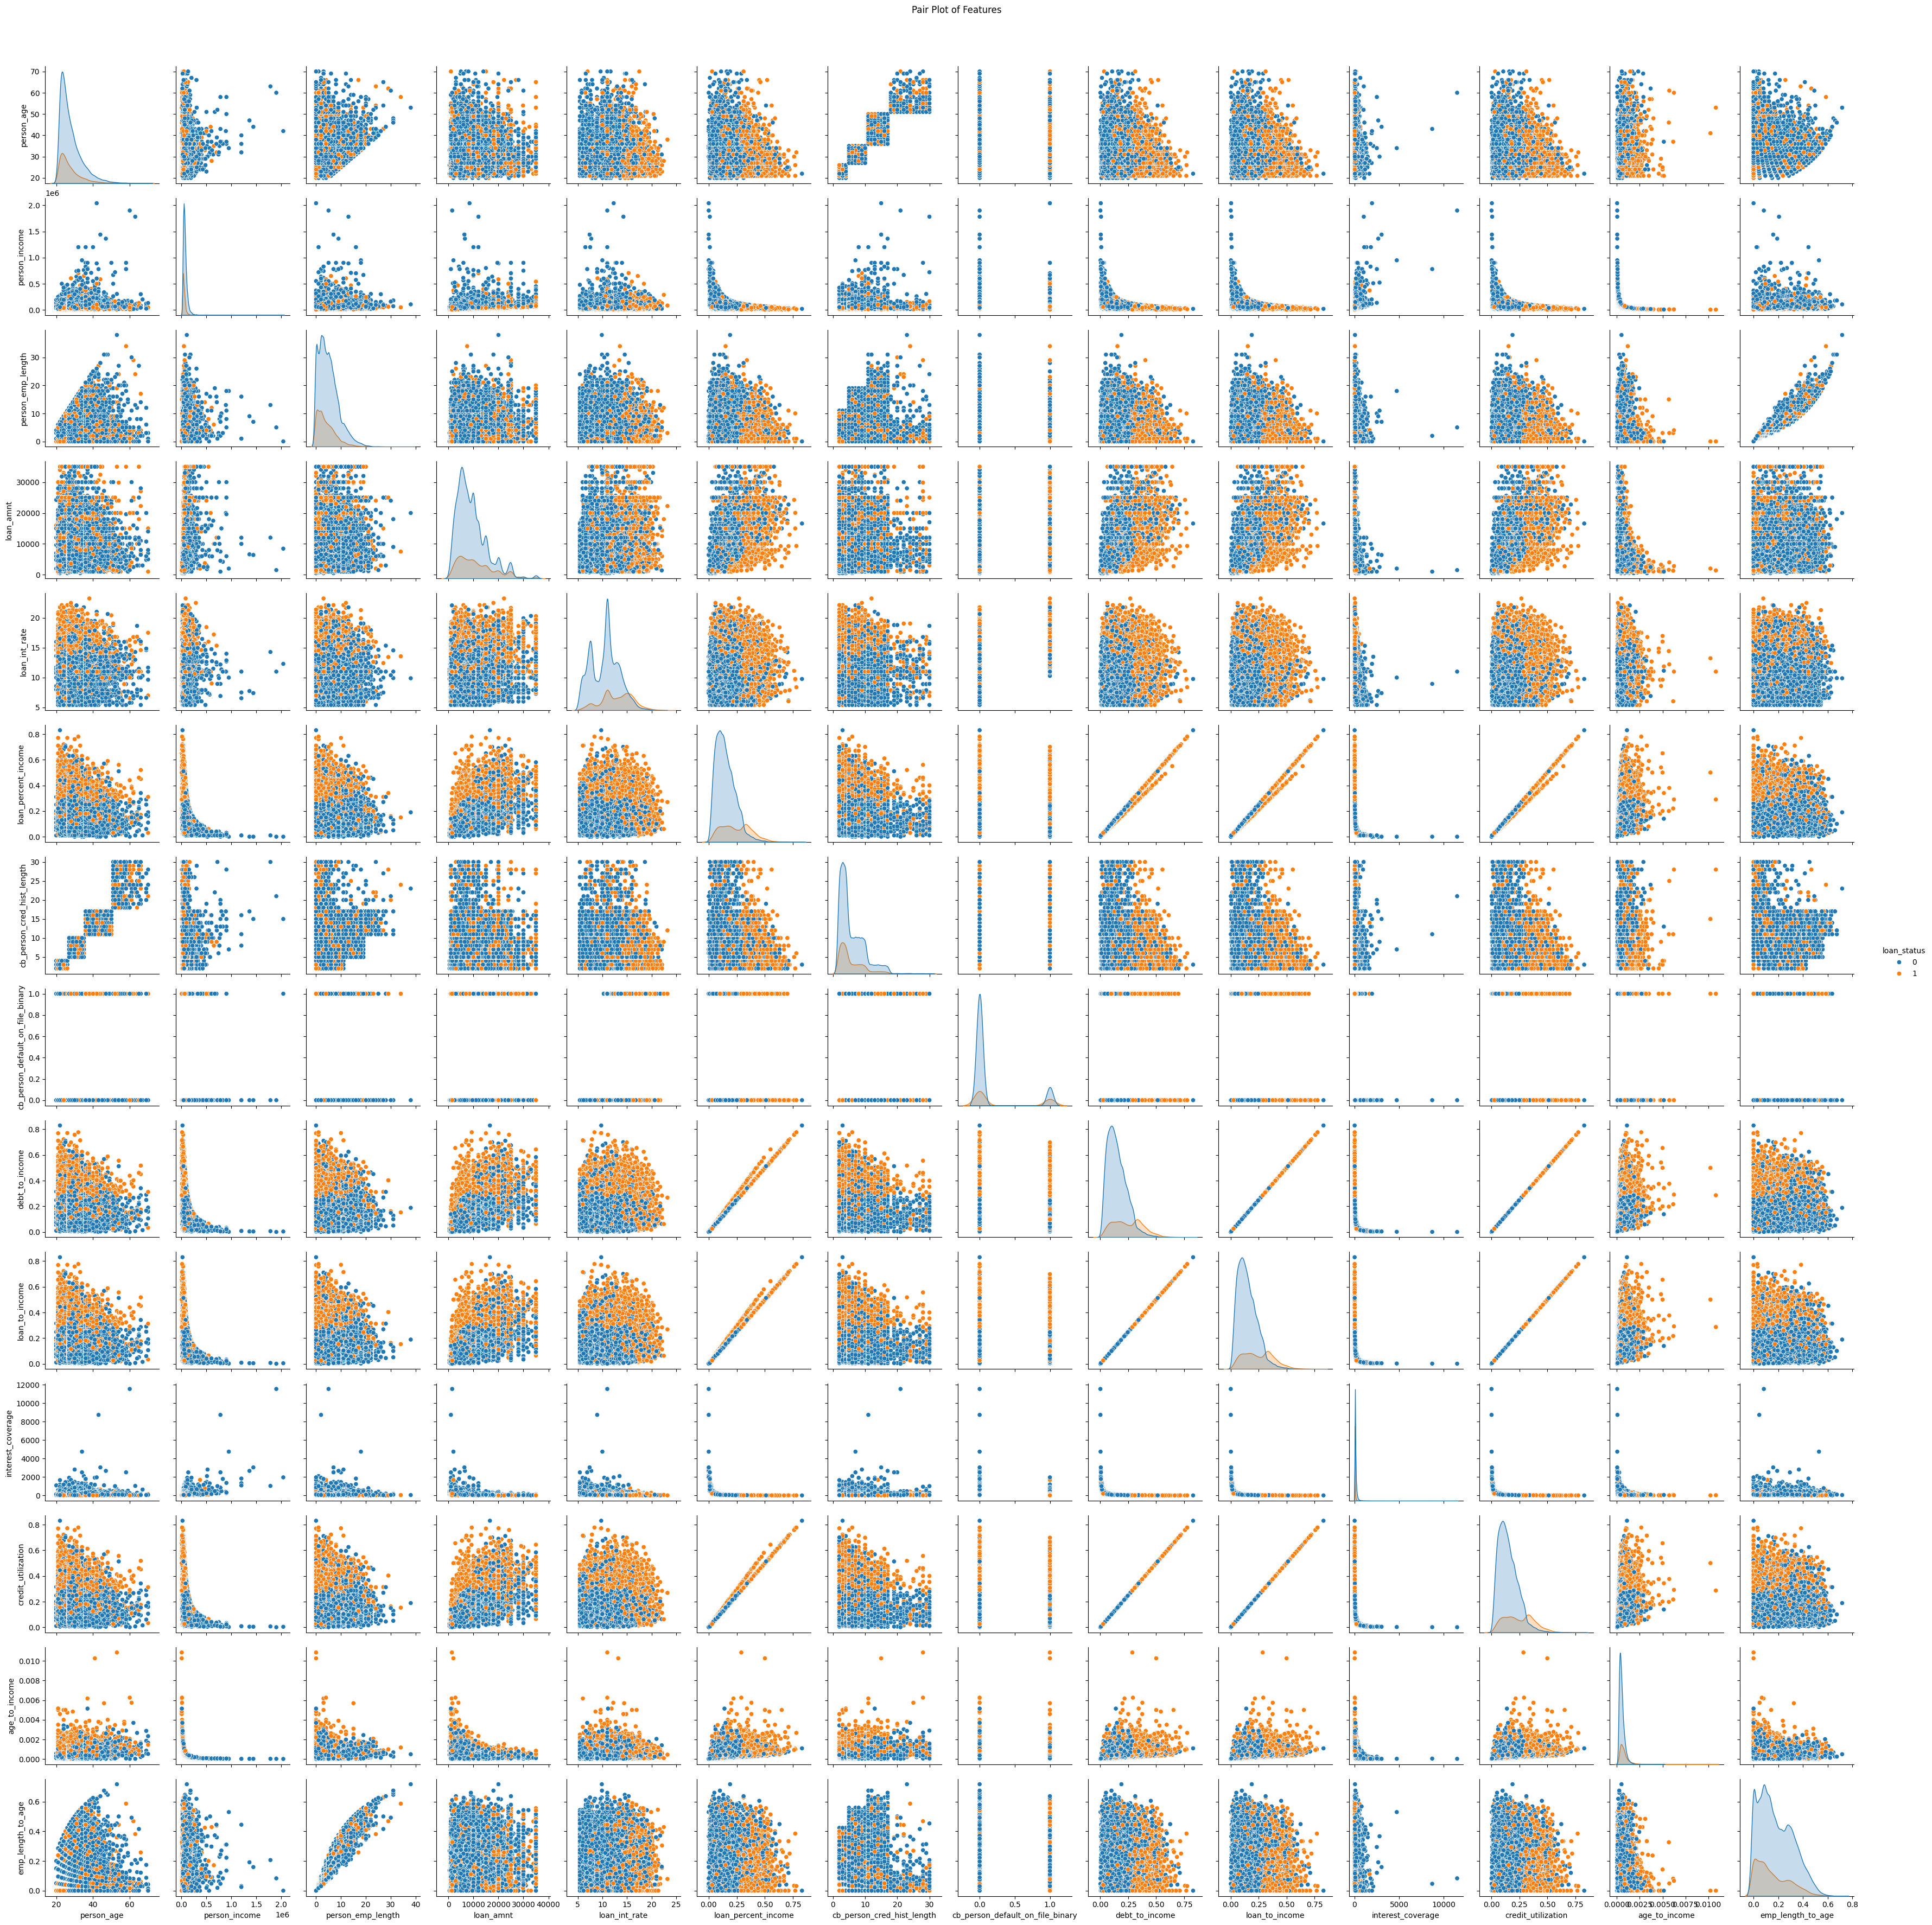

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(cr_data, hue='loan_status', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


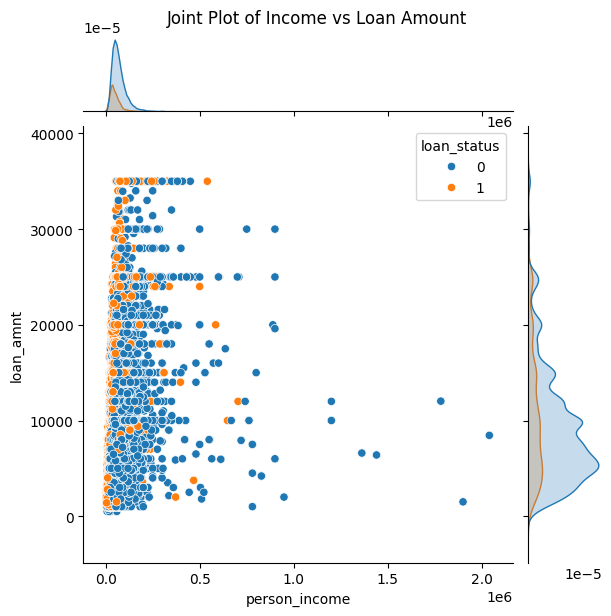

In [ ]:
#Analysing Loan Amount vs Personal Income
sns.jointplot(x='person_income', y='loan_amnt', data= cr_data, hue='loan_status')
plt.suptitle('Joint Plot of Income vs Loan Amount', y=1.02)
plt.show()

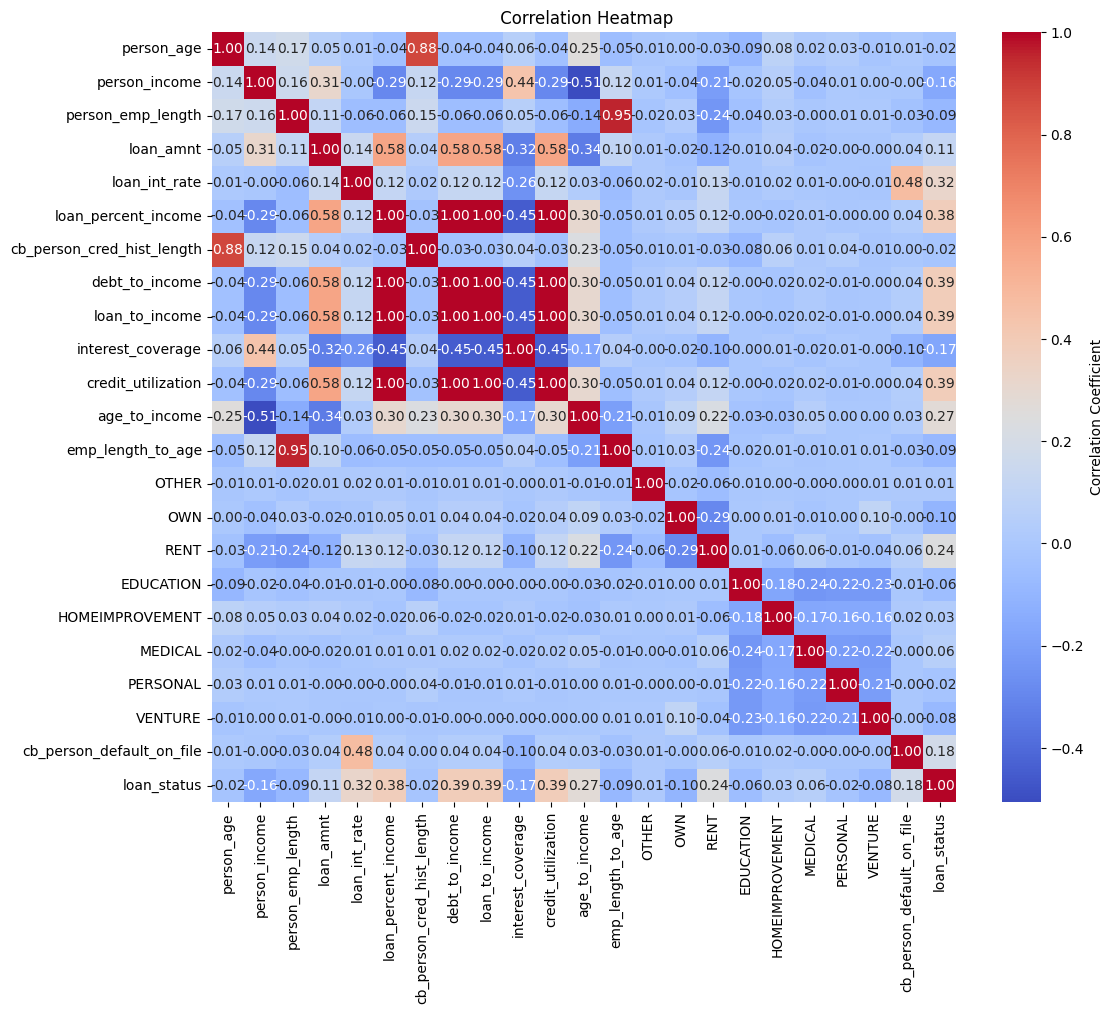

In [ ]:
# Correlation heatmap with annotations
plt.figure(figsize=(12, 10))
correlation_matrix = data_to_scale.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title(' Correlation Heatmap')
plt.show()


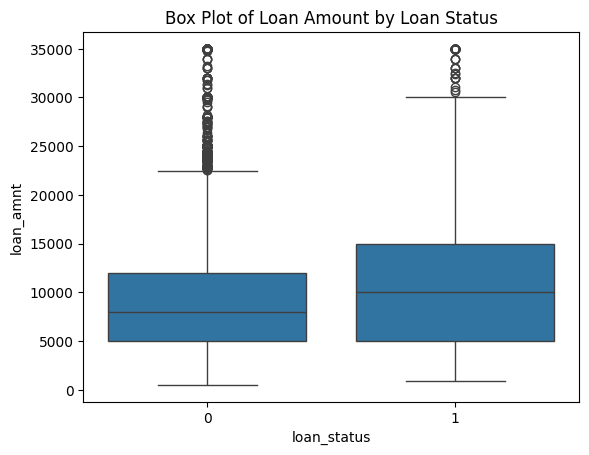

In [ ]:
# Box plot for loan amount by loan status
sns.boxplot(x='loan_status', y='loan_amnt', data=cr_data)
plt.title('Box Plot of Loan Amount by Loan Status')
plt.show()


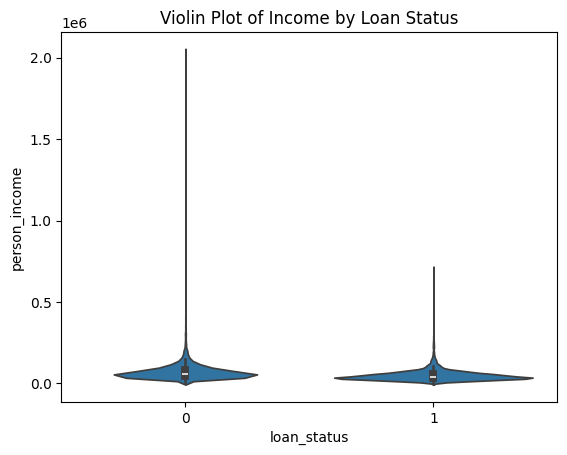

In [ ]:
#Violoin plot showing loan status and person income
sns.violinplot(x='loan_status', y='person_income', data=cr_data)
plt.title('Violin Plot of Income by Loan Status')
plt.show()


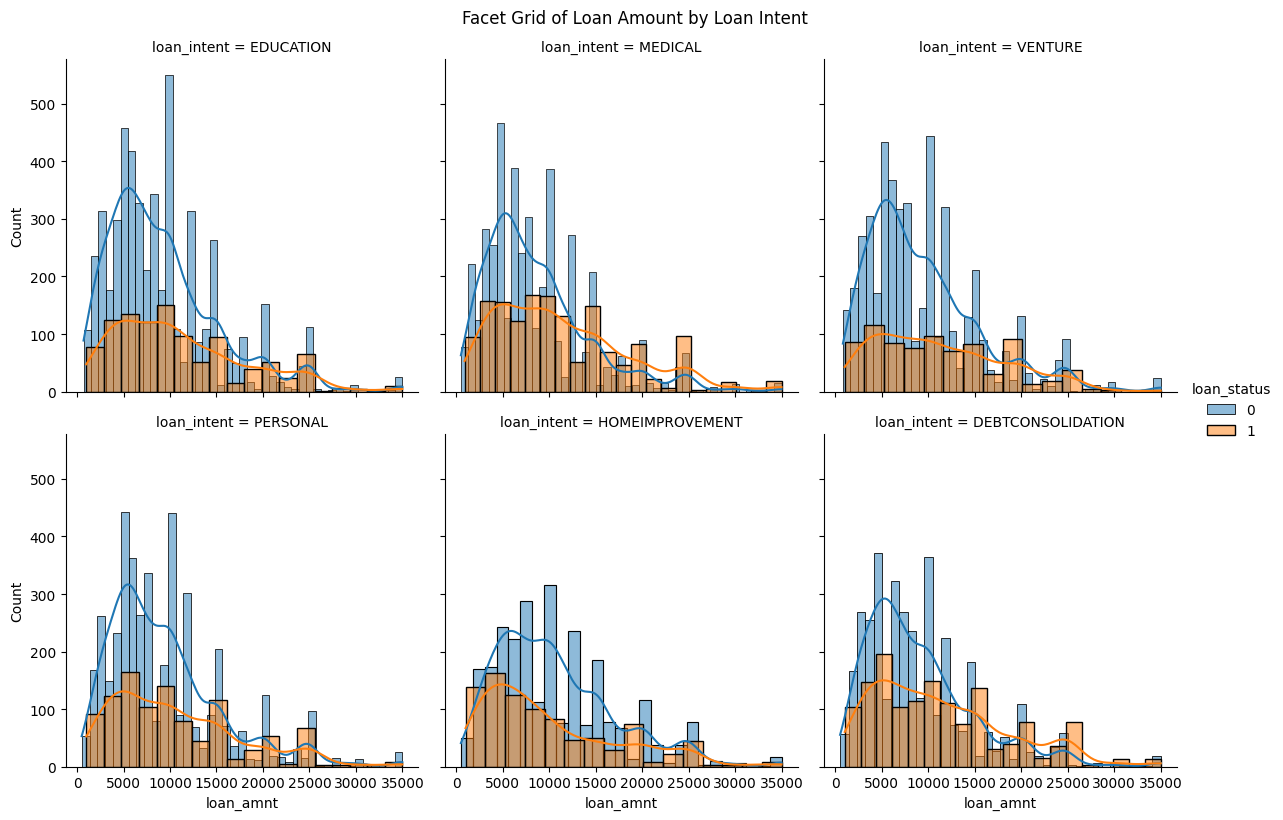

In [ ]:
g = sns.FacetGrid(cr_data, col='loan_intent', hue='loan_status', col_wrap=3, height=4)
g.map(sns.histplot, 'loan_amnt', kde=True)
g.add_legend()
plt.suptitle('Facet Grid of Loan Amount by Loan Intent', y=1.02)
plt.show()


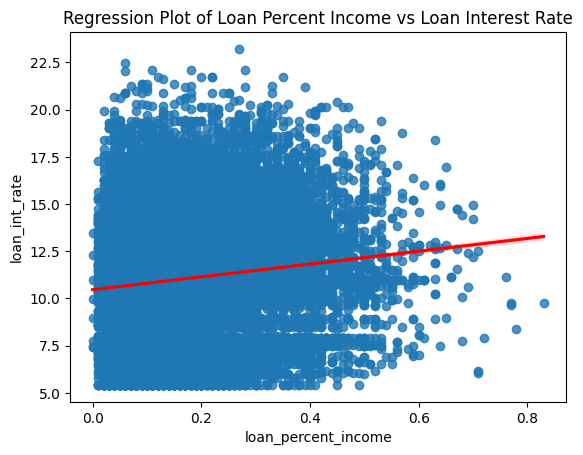

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='loan_percent_income', y='loan_int_rate', data=cr_data, line_kws={"color": "red"})
plt.title('Regression Plot of Loan Percent Income vs Loan Interest Rate')
plt.show()


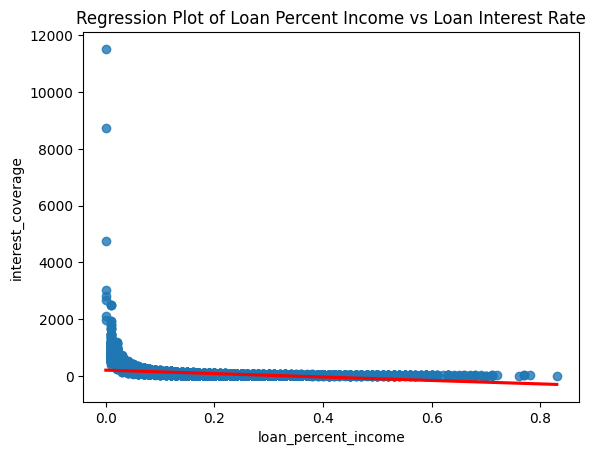

In [ ]:
sns.regplot(x='loan_percent_income', y='interest_coverage', data=cr_data, line_kws={"color": "red"})
plt.title('Regression Plot of Loan Percent Income vs Loan Interest Rate')
plt.show()

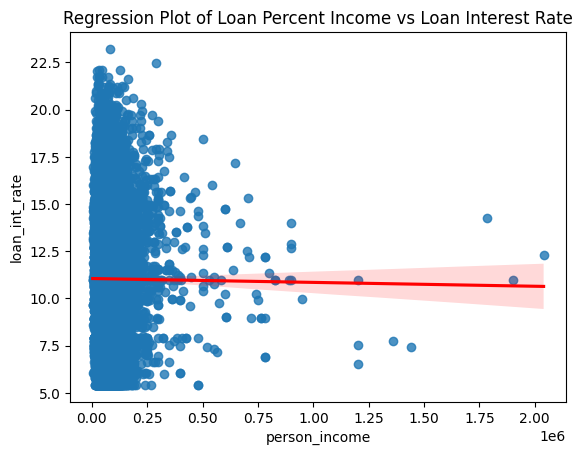

In [ ]:
sns.regplot(x='person_income', y='loan_int_rate', data=cr_data, line_kws={"color": "red"})
plt.title('Regression Plot of Loan Percent Income vs Loan Interest Rate')
plt.show()

In [ ]:
data_to_scale.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.090587      -1.078051           0.054432  -1.367192       0.034115   
1   -0.441211      -1.078051          -0.938456  -0.656810       0.597575   
2   -0.765899      -0.018803          -0.193790   4.000141       1.366226   
3   -0.603555      -0.229137           0.799097   4.000141       1.053554   
4   -1.090587      -1.072366          -0.690234  -1.130398      -1.268682   

   loan_percent_income  cb_person_cred_hist_length  debt_to_income  \
0            -0.655113                   -0.939656       -0.617677   
1             3.767461                   -0.692664        3.781684   
2             3.391072                   -0.939656        3.419735   
3             3.579267                   -0.445671        4.443025   
4             0.756347                   -0.939656        0.774714   

   loan_to_income  interest_coverage  ...  OTHER  OWN  RENT  EDUCATION  \
0       -0.617677          -0.085858  ...      0    1     0          1   
1        3.781684          -0.593913  ...      0    0     0          0   
2        3.419735          -0.602830  ...      0    0     1          0   
3        4.443025          -0.612596  ...      0    0     1          0   
4        0.774714          -0.300752  ...      0    1     0          0   

   HOMEIMPROVEMENT  MEDICAL  PERSONAL  VENTURE  cb_person_default_on_file  \
0                0        0         0        0                          0   
1                0        1         0        0                          0   
2                0        1         0        0                          0   
3                0        1         0        0                          1   
4                0        0         0        1                          0   

   loan_status  
0            0  
1            1  
2            1  
3            1  
4            1  

[5 rows x 23 columns]

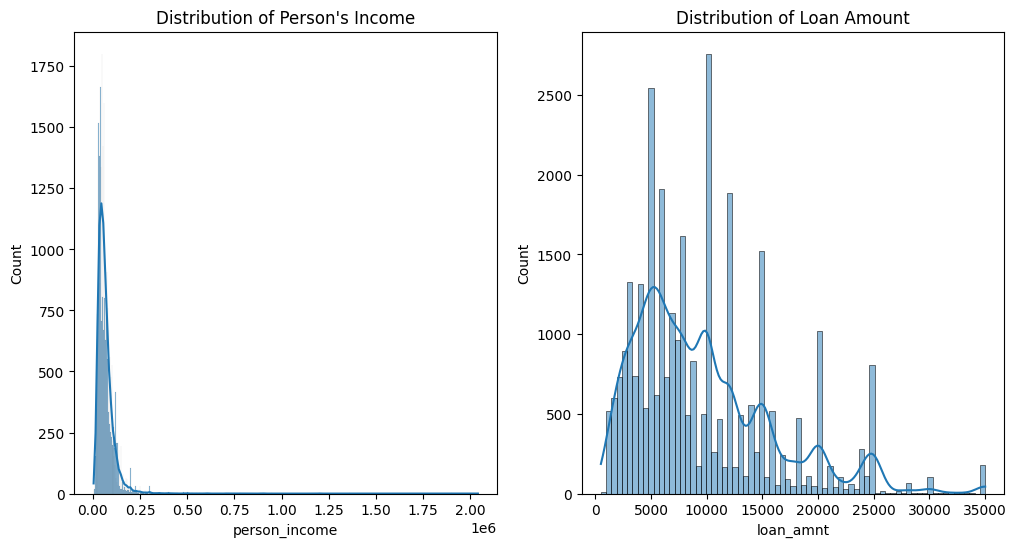

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cr_data['person_income'], kde=True)
plt.title("Distribution of Person's Income")

plt.subplot(1, 2, 2)
sns.histplot(cr_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()


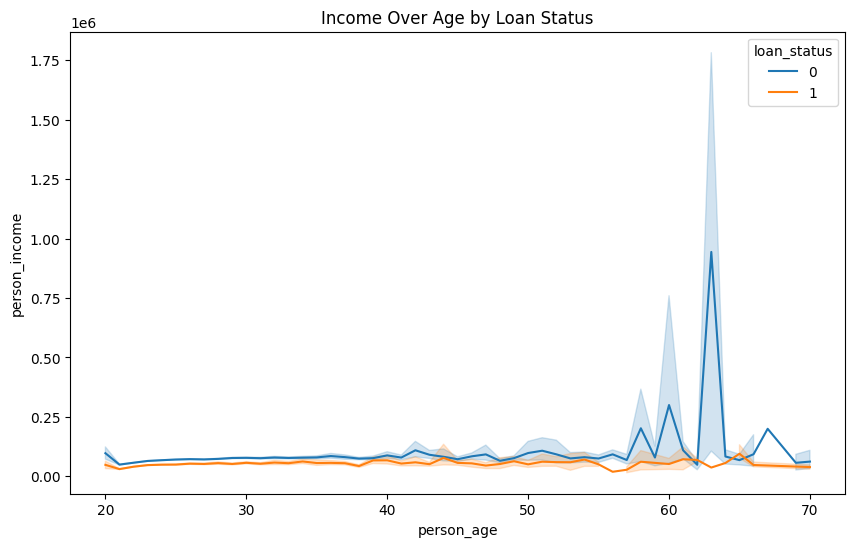

In [ ]:
df = pd.read_csv("/content/sample_data/credit_risk_dataset.csv")
# Outliers Treatment
cr_age_rmvd = df[df['person_age'] <= 70]
cr_age_rmvd.reset_index(drop=True, inplace=True)
person_emp_rmvd = cr_age_rmvd[cr_age_rmvd['person_emp_length'] <= 47]
person_emp_rmvd.reset_index(drop=True, inplace=True)
cr_data = person_emp_rmvd.copy()
plt.figure(figsize=(10, 6))
sns.lineplot(x='person_age', y='person_income', data=cr_data, hue='loan_status')
plt.title('Income Over Age by Loan Status')
plt.show()


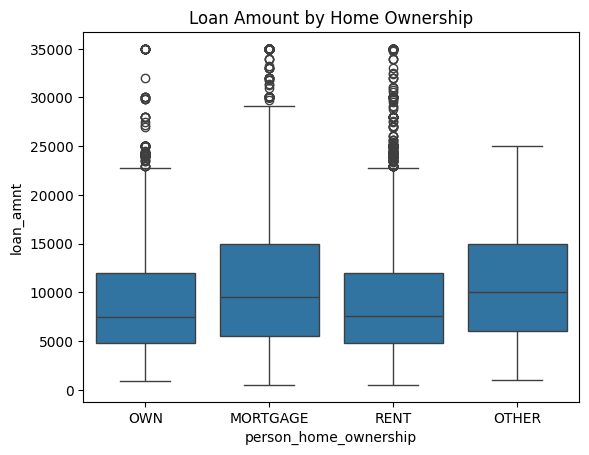

In [ ]:

sns.boxplot(x='person_home_ownership', y='loan_amnt', data=cr_data)
plt.title('Loan Amount by Home Ownership')
plt.show()


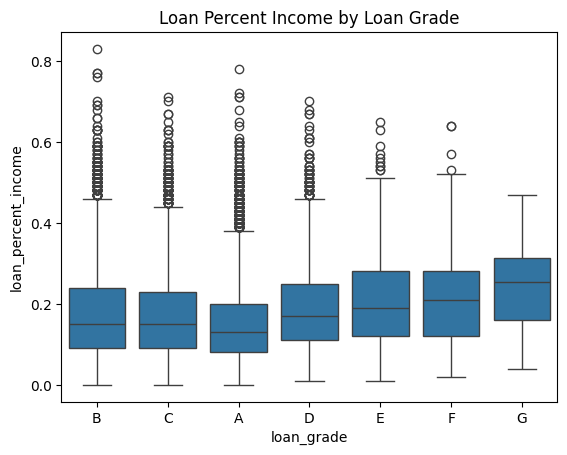

In [ ]:
sns.boxplot(x='loan_grade', y='loan_percent_income', data=cr_data)
plt.title('Loan Percent Income by Loan Grade')
plt.show()


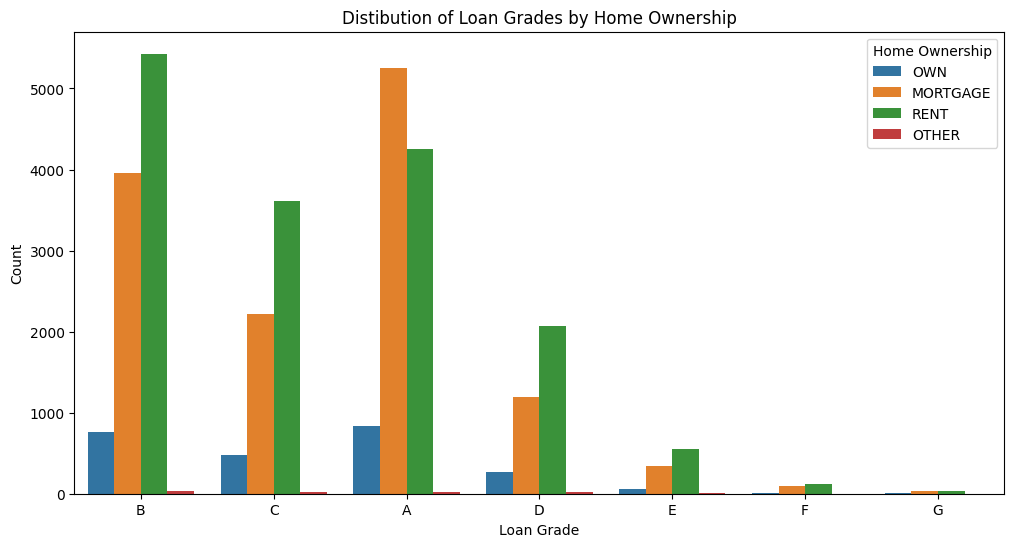

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=cr_data,x="loan_grade",hue = 'person_home_ownership')
plt.title('Distibution of Loan Grades by Home Ownership')
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.legend(title='Home Ownership')
plt.show()

In [ ]:
cr_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.10                         N                           2  
1                 0.57                         N                           3  
2                 0.53                         N                           2  
3                 0.55                         Y                           4  
4                 0.25                         N                           2